In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# %matplotlib notebook
%matplotlib inline


In [242]:
# opening earthquake data
eq_df = pd.read_csv('../oklahoma_earthquakes_largefiles/usgs_cleaned/usgs_eqs_reduced_data.csv', low_memory=False)
# converting date fields to date-time dtype
eq_df.iloc[:, 10] = eq_df.iloc[:, 10].apply(pd.to_datetime)

In [153]:
eq_df.dtypes

id                   object
time                  int64
mag                 float64
magType              object
cdi                 float64
place                object
status               object
latitude            float64
longitude           float64
depth               float64
date         datetime64[ns]
dtype: object

In [243]:
# subtracting 7 days to test offset/delayed effect 
# time_change = datetime.timedelta(days=7)
eq_df["date_minus_7"] = eq_df["date"] - pd.Timedelta(days=7)
eq_df["date_minus_14"] = eq_df["date"] - pd.Timedelta(days=14)
eq_df["date_minus_21"] = eq_df["date"] - pd.Timedelta(days=21)
eq_df["date_minus_28"] = eq_df["date"] - pd.Timedelta(days=28)
eq_df["date_minus_35"] = eq_df["date"] - pd.Timedelta(days=35)
eq_df["date_minus_42"] = eq_df["date"] - pd.Timedelta(days=42)
eq_df["date_minus_49"] = eq_df["date"] - pd.Timedelta(days=49)
eq_df["date_minus_56"] = eq_df["date"] - pd.Timedelta(days=56)
eq_df["date_minus_63"] = eq_df["date"] - pd.Timedelta(days=63)
eq_df["date_minus_70"] = eq_df["date"] - pd.Timedelta(days=70)
eq_df
# mondist['shifted_date'] = mondist.date + pd.Timedelta(days=1)

,id,time,mag,magType,cdi,place,status,latitude,longitude,depth,...,date_minus_7,date_minus_14,date_minus_21,date_minus_28,date_minus_35,date_minus_42,date_minus_49,date_minus_56,date_minus_63,date_minus_70
0,us2000iz6u,1546166814510,2.2,mb_lg,NaN,"6 km ESE of Cleo Springs, Oklahoma",reviewed,36.3818,-98.3804,6.01,...,2018-12-23 10:46:54.510,2018-12-16 10:46:54.510,2018-12-09 10:46:54.510,2018-12-02 10:46:54.510,2018-11-25 10:46:54.510,2018-11-18 10:46:54.510,2018-11-11 10:46:54.510,2018-11-04 10:46:54.510,2018-10-28 10:46:54.510,2018-10-21 10:46:54.510
1,us2000iz51,1546159833730,2.0,mb_lg,NaN,"5 km ESE of Cleo Springs, Oklahoma",reviewed,36.3917,-98.3808,6.28,...,2018-12-23 08:50:33.730,2018-12-16 08:50:33.730,2018-12-09 08:50:33.730,2018-12-02 08:50:33.730,2018-11-25 08:50:33.730,2018-11-18 08:50:33.730,2018-11-11 08:50:33.730,2018-11-04 08:50:33.730,2018-10-28 08:50:33.730,2018-10-21 08:50:33.730
2,us2000iz4w,1546158498840,2.2,ml,NaN,"13 km NNW of Pawnee, Oklahoma",reviewed,36.4443,-96.8762,5.36,...,2018-12-23 08:28:18.840,2018-12-16 08:28:18.840,2018-12-09 08:28:18.840,2018-12-02 08:28:18.840,2018-11-25 08:28:18.840,2018-11-18 08:28:18.840,2018-11-11 08:28:18.840,2018-11-04 08:28:18.840,2018-10-28 08:28:18.840,2018-10-21 08:28:18.840
3,us2000iyvs,1546073324730,2.5,mb_lg,3.3,"5 km WSW of Arcadia, Oklahoma",reviewed,35.6547,-97.3898,5.00,...,2018-12-22 08:48:44.730,2018-12-15 08:48:44.730,2018-12-08 08:48:44.730,2018-12-01 08:48:44.730,2018-11-24 08:48:44.730,2018-11-17 08:48:44.730,2018-11-10 08:48:44.730,2018-11-03 08:48:44.730,2018-10-27 08:48:44.730,2018-10-20 08:48:44.730
4,us2000iyvq,1546073222930,2.2,mb_lg,NaN,"6 km W of Arcadia, Oklahoma",reviewed,35.6747,-97.3990,7.42,...,2018-12-22 08:47:02.930,2018-12-15 08:47:02.930,2018-12-08 08:47:02.930,2018-12-01 08:47:02.930,2018-11-24 08:47:02.930,2018-11-17 08:47:02.930,2018-11-10 08:47:02.930,2018-11-03 08:47:02.930,2018-10-27 08:47:02.930,2018-10-20 08:47:02.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,usp000gucq,1235535255330,3.3,mblg,3.8,"4 km SE of Ashland, Oklahoma",reviewed,34.7350,-96.0360,5.00,...,2009-02-18 04:14:15.330,2009-02-11 04:14:15.330,2009-02-04 04:14:15.330,2009-01-28 04:14:15.330,2009-01-21 04:14:15.330,2009-01-14 04:14:15.330,2009-01-07 04:14:15.330,2008-12-31 04:14:15.330,2008-12-24 04:14:15.330,2008-12-17 04:14:15.330
20620,usp000gu9h,1235295786750,3.2,mblg,3.8,"2 km S of Lahoma, Oklahoma",reviewed,36.3690,-98.0870,5.00,...,2009-02-15 09:43:06.750,2009-02-08 09:43:06.750,2009-02-01 09:43:06.750,2009-01-25 09:43:06.750,2009-01-18 09:43:06.750,2009-01-11 09:43:06.750,2009-01-04 09:43:06.750,2008-12-28 09:43:06.750,2008-12-21 09:43:06.750,2008-12-14 09:43:06.750
20621,usp000gtdu,1233656590010,3.1,mblg,2.2,"2 km SSE of Centrahoma, Oklahoma",reviewed,34.5890,-96.3400,5.00,...,2009-01-27 10:23:10.010,2009-01-20 10:23:10.010,2009-01-13 10:23:10.010,2009-01-06 10:23:10.010,2008-12-30 10:23:10.010,2008-12-23 10:23:10.010,2008-12-16 10:23:10.010,2008-12-09 10:23:10.010,2008-12-02 10:23:10.010,2008-11-25 10:23:10.010
20622,usp000gt8m,1233277072380,2.4,mblg,2.9,"4 km NW of Chandler, Oklahoma",reviewed,35.7240,-96.9200,5.00,...,2009-01-23 00:57:52.380,2009-01-16 00:57:52.380,2009-01-09 00:57:52.380,2009-01-02 00:57:52.380,2008-12-26 00:57:52.380,2008-12-19 00:57:52.380,2008-12-12 00:57:52.380,2008-12-05 00:57:52.380,2008-11-28 00:57:52.380,2008-11-21 00:57:52.380


<AxesSubplot:>

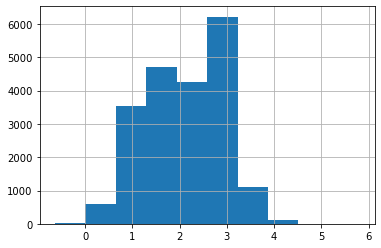

In [46]:
eq_df.mag.hist()

In [4]:
# monthly injection volumes
df_monthly_reduced = pd.read_csv("../oklahoma_earthquakes_largefiles/occ_monthly_cleaned/occ_monthly_reduced.csv", low_memory=False)

In [5]:
# convery monthly injection rate dates to datetime dtype, sort by date
df_monthly_reduced.iloc[:, 0] = df_monthly_reduced.iloc[:, 0].apply(pd.to_datetime)
df_monthly_reduced = df_monthly_reduced.sort_values(by="date")
df_monthly_reduced

,date,monthly_volume,count,count_>0
12,2011-01-31,10643949.0,205,141
13,2011-02-28,9144807.0,205,143
14,2011-03-31,11135572.0,205,148
15,2011-04-30,11033870.0,205,155
16,2011-05-31,12309264.0,205,158
...,...,...,...,...
55,2020-08-31,14347672.0,551,291
56,2020-09-30,14347550.0,551,319
57,2020-10-31,13677428.0,551,289
58,2020-11-30,13658160.0,551,282


In [6]:
# grouping monthly injection rates by year
yearly_inj = df_monthly_reduced.groupby(pd.Grouper(key="date",freq='Y'))["monthly_volume"].sum()
yearly_inj_df = pd.DataFrame(yearly_inj)
yearly_inj_df.rename(columns={"monthly_volume":"total_volume"}, inplace = True)
yearly_inj_df.head()

,total_volume
date,
2011-12-31,1.664990e+08
2012-12-31,3.258057e+08
2013-12-31,4.489084e+08
2014-12-31,6.057499e+08
2015-12-31,5.608524e+08


In [244]:
# Filtering for earthquakes for M>=3
mag_3 = eq_df[eq_df["mag"] >= 3]
mag_3

,id,time,mag,magType,cdi,place,status,latitude,longitude,depth,...,date_minus_7,date_minus_14,date_minus_21,date_minus_28,date_minus_35,date_minus_42,date_minus_49,date_minus_56,date_minus_63,date_minus_70
5,us2000iytp,1546056357890,3.0,mb_lg,3.1,"3 km ESE of Hennessey, Oklahoma",reviewed,36.0998,-97.8674,5.00,...,2018-12-22 04:05:57.890,2018-12-15 04:05:57.890,2018-12-08 04:05:57.890,2018-12-01 04:05:57.890,2018-11-24 04:05:57.890,2018-11-17 04:05:57.890,2018-11-10 04:05:57.890,2018-11-03 04:05:57.890,2018-10-27 04:05:57.890,2018-10-20 04:05:57.890
7,us2000iym1,1546000348980,3.1,mb_lg,2.7,"5 km ESE of Cleo Springs, Oklahoma",reviewed,36.3858,-98.3860,5.00,...,2018-12-21 12:32:28.980,2018-12-14 12:32:28.980,2018-12-07 12:32:28.980,2018-11-30 12:32:28.980,2018-11-23 12:32:28.980,2018-11-16 12:32:28.980,2018-11-09 12:32:28.980,2018-11-02 12:32:28.980,2018-10-26 12:32:28.980,2018-10-19 12:32:28.980
11,us2000iwfw,1545520825020,3.1,ml,NaN,"0 km SE of Wakita, Oklahoma",reviewed,36.8790,-97.9152,7.21,...,2018-12-15 23:20:25.020,2018-12-08 23:20:25.020,2018-12-01 23:20:25.020,2018-11-24 23:20:25.020,2018-11-17 23:20:25.020,2018-11-10 23:20:25.020,2018-11-03 23:20:25.020,2018-10-27 23:20:25.020,2018-10-20 23:20:25.020,2018-10-13 23:20:25.020
17,us2000iud8,1545032568230,3.0,mb_lg,2.0,"16 km SSE of Waynoka, Oklahoma",reviewed,36.4566,-98.7897,5.00,...,2018-12-10 07:42:48.230,2018-12-03 07:42:48.230,2018-11-26 07:42:48.230,2018-11-19 07:42:48.230,2018-11-12 07:42:48.230,2018-11-05 07:42:48.230,2018-10-29 07:42:48.230,2018-10-22 07:42:48.230,2018-10-15 07:42:48.230,2018-10-08 07:42:48.230
19,us2000itxh,1544909464050,3.0,mb_lg,2.2,"5 km WNW of Lucien, Oklahoma",reviewed,36.2856,-97.5158,4.86,...,2018-12-08 21:31:04.050,2018-12-01 21:31:04.050,2018-11-24 21:31:04.050,2018-11-17 21:31:04.050,2018-11-10 21:31:04.050,2018-11-03 21:31:04.050,2018-10-27 21:31:04.050,2018-10-20 21:31:04.050,2018-10-13 21:31:04.050,2018-10-06 21:31:04.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20618,usp000gurq,1236517599940,3.4,mblg,4.0,"0 km SSE of Smith Village, Oklahoma",reviewed,35.4460,-97.4560,5.00,...,2009-03-01 13:06:39.940,2009-02-22 13:06:39.940,2009-02-15 13:06:39.940,2009-02-08 13:06:39.940,2009-02-01 13:06:39.940,2009-01-25 13:06:39.940,2009-01-18 13:06:39.940,2009-01-11 13:06:39.940,2009-01-04 13:06:39.940,2008-12-28 13:06:39.940
20619,usp000gucq,1235535255330,3.3,mblg,3.8,"4 km SE of Ashland, Oklahoma",reviewed,34.7350,-96.0360,5.00,...,2009-02-18 04:14:15.330,2009-02-11 04:14:15.330,2009-02-04 04:14:15.330,2009-01-28 04:14:15.330,2009-01-21 04:14:15.330,2009-01-14 04:14:15.330,2009-01-07 04:14:15.330,2008-12-31 04:14:15.330,2008-12-24 04:14:15.330,2008-12-17 04:14:15.330
20620,usp000gu9h,1235295786750,3.2,mblg,3.8,"2 km S of Lahoma, Oklahoma",reviewed,36.3690,-98.0870,5.00,...,2009-02-15 09:43:06.750,2009-02-08 09:43:06.750,2009-02-01 09:43:06.750,2009-01-25 09:43:06.750,2009-01-18 09:43:06.750,2009-01-11 09:43:06.750,2009-01-04 09:43:06.750,2008-12-28 09:43:06.750,2008-12-21 09:43:06.750,2008-12-14 09:43:06.750
20621,usp000gtdu,1233656590010,3.1,mblg,2.2,"2 km SSE of Centrahoma, Oklahoma",reviewed,34.5890,-96.3400,5.00,...,2009-01-27 10:23:10.010,2009-01-20 10:23:10.010,2009-01-13 10:23:10.010,2009-01-06 10:23:10.010,2008-12-30 10:23:10.010,2008-12-23 10:23:10.010,2008-12-16 10:23:10.010,2008-12-09 10:23:10.010,2008-12-02 10:23:10.010,2008-11-25 10:23:10.010


In [245]:
# monthly count of earthquakes where M>=3
monthly_count_eq = mag_3.groupby(pd.Grouper(key="date",freq='M'))["mag"].count()
monthly_count_eq_df = pd.DataFrame(monthly_count_eq)
monthly_count_eq_df.head()

,mag
date,
2009-01-31,1
2009-02-28,3
2009-03-31,1
2009-04-30,0
2009-05-31,0


In [246]:
# monthly count of earthquakes where M>=3, day-7
monthly_count_eq_minus_7 = mag_3.groupby(pd.Grouper(key="date_minus_7",freq='M'))["mag"].count()
monthly_count_eq_minus_7_df = pd.DataFrame(monthly_count_eq_minus_7)
monthly_count_eq_minus_7_df.reset_index(inplace=True)
monthly_count_eq_minus_7_df.rename(columns={"date_minus_7":"date"}, inplace = True)
monthly_count_eq_minus_7_df.set_index("date", inplace=True)
monthly_count_eq_minus_7_df.head()

,mag
date,
2009-01-31,2
2009-02-28,2
2009-03-31,1
2009-04-30,0
2009-05-31,0


In [247]:
# monthly count of earthquakes where M>=3, day-14
monthly_count_eq_minus_14 = mag_3.groupby(pd.Grouper(key="date_minus_14",freq='M'))["mag"].count()
monthly_count_eq_minus_14_df = pd.DataFrame(monthly_count_eq_minus_14)
monthly_count_eq_minus_14_df.reset_index(inplace=True)
monthly_count_eq_minus_14_df.rename(columns={"date_minus_14":"date"}, inplace = True)
monthly_count_eq_minus_14_df.set_index("date", inplace=True)
monthly_count_eq_minus_14_df.head()

,mag
date,
2009-01-31,2
2009-02-28,3
2009-03-31,0
2009-04-30,0
2009-05-31,1


In [248]:
# monthly count of earthquakes where M>=3, day-21
monthly_count_eq_minus_21 = mag_3.groupby(pd.Grouper(key="date_minus_21",freq='M'))["mag"].count()
monthly_count_eq_minus_21_df = pd.DataFrame(monthly_count_eq_minus_21)
monthly_count_eq_minus_21_df.reset_index(inplace=True)
monthly_count_eq_minus_21_df.rename(columns={"date_minus_21":"date"}, inplace = True)
monthly_count_eq_minus_21_df.set_index("date", inplace=True)
monthly_count_eq_minus_21_df.head()

,mag
date,
2009-01-31,2
2009-02-28,3
2009-03-31,0
2009-04-30,0
2009-05-31,1


In [249]:
# monthly count of earthquakes where M>=3, day-28
monthly_count_eq_minus_28 = mag_3.groupby(pd.Grouper(key="date_minus_28",freq='M'))["mag"].count()
monthly_count_eq_minus_28_df = pd.DataFrame(monthly_count_eq_minus_28)
monthly_count_eq_minus_28_df.reset_index(inplace=True)
monthly_count_eq_minus_28_df.rename(columns={"date_minus_28":"date"}, inplace = True)
monthly_count_eq_minus_28_df.set_index("date", inplace=True)
monthly_count_eq_minus_28_df.head()

,mag
date,
2008-12-31,1
2009-01-31,3
2009-02-28,1
2009-03-31,0
2009-04-30,0


In [250]:
# monthly count of earthquakes where M>=3, day-35
monthly_count_eq_minus_35 = mag_3.groupby(pd.Grouper(key="date_minus_35",freq='M'))["mag"].count()
monthly_count_eq_minus_35_df = pd.DataFrame(monthly_count_eq_minus_35)
monthly_count_eq_minus_35_df.reset_index(inplace=True)
monthly_count_eq_minus_35_df.rename(columns={"date_minus_35":"date"}, inplace = True)
monthly_count_eq_minus_35_df.set_index("date", inplace=True)
monthly_count_eq_minus_35_df.head()

,mag
date,
2008-12-31,2
2009-01-31,2
2009-02-28,1
2009-03-31,0
2009-04-30,0


In [251]:
# monthly count of earthquakes where M>=3, day-42
monthly_count_eq_minus_42 = mag_3.groupby(pd.Grouper(key="date_minus_42",freq='M'))["mag"].count()
monthly_count_eq_minus_42_df = pd.DataFrame(monthly_count_eq_minus_42)
monthly_count_eq_minus_42_df.reset_index(inplace=True)
monthly_count_eq_minus_42_df.rename(columns={"date_minus_42":"date"}, inplace = True)
monthly_count_eq_minus_42_df.set_index("date", inplace=True)
monthly_count_eq_minus_42_df.head()

,mag
date,
2008-12-31,2
2009-01-31,3
2009-02-28,0
2009-03-31,0
2009-04-30,0


In [252]:
# monthly count of earthquakes where M>=3, day-49
monthly_count_eq_minus_49 = mag_3.groupby(pd.Grouper(key="date_minus_49",freq='M'))["mag"].count()
monthly_count_eq_minus_49_df = pd.DataFrame(monthly_count_eq_minus_49)
monthly_count_eq_minus_49_df.reset_index(inplace=True)
monthly_count_eq_minus_49_df.rename(columns={"date_minus_49":"date"}, inplace = True)
monthly_count_eq_minus_49_df.set_index("date", inplace=True)
monthly_count_eq_minus_49_df.head()

,mag
date,
2008-12-31,2
2009-01-31,3
2009-02-28,0
2009-03-31,0
2009-04-30,1


In [255]:
# monthly count of earthquakes where M>=3, day-56
monthly_count_eq_minus_56 = mag_3.groupby(pd.Grouper(key="date_minus_56",freq='M'))["mag"].count()
monthly_count_eq_minus_56_df = pd.DataFrame(monthly_count_eq_minus_56)
monthly_count_eq_minus_56_df.reset_index(inplace=True)
monthly_count_eq_minus_56_df.rename(columns={"date_minus_56":"date"}, inplace = True)
monthly_count_eq_minus_56_df.set_index("date", inplace=True)
monthly_count_eq_minus_56_df.head()

,mag
date,
2008-12-31,4
2009-01-31,1
2009-02-28,0
2009-03-31,0
2009-04-30,1


In [256]:
# monthly count of earthquakes where M>=3, day-63
monthly_count_eq_minus_63 = mag_3.groupby(pd.Grouper(key="date_minus_63",freq='M'))["mag"].count()
monthly_count_eq_minus_63_df = pd.DataFrame(monthly_count_eq_minus_63)
monthly_count_eq_minus_63_df.reset_index(inplace=True)
monthly_count_eq_minus_63_df.rename(columns={"date_minus_63":"date"}, inplace = True)
monthly_count_eq_minus_63_df.set_index("date", inplace=True)
monthly_count_eq_minus_63_df.head()

,mag
date,
2008-11-30,1
2008-12-31,3
2009-01-31,1
2009-02-28,0
2009-03-31,0


In [257]:
# monthly count of earthquakes where M>=3, day-70
monthly_count_eq_minus_70 = mag_3.groupby(pd.Grouper(key="date_minus_70",freq='M'))["mag"].count()
monthly_count_eq_minus_70_df = pd.DataFrame(monthly_count_eq_minus_70)
monthly_count_eq_minus_70_df.reset_index(inplace=True)
monthly_count_eq_minus_70_df.rename(columns={"date_minus_70":"date"}, inplace = True)
monthly_count_eq_minus_70_df.set_index("date", inplace=True)
monthly_count_eq_minus_70_df.head()

,mag
date,
2008-11-30,2
2008-12-31,3
2009-01-31,0
2009-02-28,0
2009-03-31,0


In [9]:
# monthly average of earthquakes where M>=3
monthly_mean_eq = mag_3.groupby(pd.Grouper(key="date",freq='M'))["mag"].mean()
monthly_mean_eq_df = pd.DataFrame(monthly_mean_eq)
monthly_mean_eq_df.head()

,mag
date,
2009-01-31,3.4
2009-02-28,3.2
2009-03-31,3.4
2009-04-30,NaN
2009-05-31,NaN


In [10]:
# monthly max of earthquakes where M>=3
monthly_max_eq = mag_3.groupby(pd.Grouper(key="date",freq='M'))["mag"].max()
monthly_max_eq_df = pd.DataFrame(monthly_max_eq)
monthly_max_eq_df.head()

,mag
date,
2009-01-31,3.4
2009-02-28,3.3
2009-03-31,3.4
2009-04-30,NaN
2009-05-31,NaN


In [11]:
# scatter plot of the max mag per month vs. the number of earthquakes per month
# high mag earthquakes have more aftershocks --> higher total monthy count
# plt.scatter(monthly_max_eq_df.mag,monthly_count_eq_df.mag)

# plt.scatter(yearly_inj_all.index, yearly_inj_all.total_volume)

In [12]:
# yearly injection volumes
df_yearly_reduced = pd.read_csv("../oklahoma_earthquakes_largefiles/occ_06-10_cleaned/inj_06_10_fm.csv", low_memory=False)
df_yearly_reduced

,api,api_year,api_county,api_number,lease_name,well_number,decimal_lat,decimal_long,year,fluid_type,packerdepth,total_volume,formationname
0,3500300026,3500300026-2010,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2010,S,4850,11863,CHEROKEE
1,3500300026,3500300026-2009,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2009,S,4850,11825,CHEROKEE
2,3500300026,3500300026-2008,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2008,S,4850,12236,CHEROKEE
3,3500300026,3500300026-2007,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2007,S,4850,9540,CHEROKEE
4,3500300163,3500300163-2010,3,163,CHRISTENSEN,1,36.896636,-98.17772,2010,S,4933,20120,REDFORK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53892,3509900664,3509900664-2010,99,664,N.E. DAVIS UNIT,10-4,34.547188,-97.07791,2010,S,1963,237573,OIL CREEK
53893,3509900664,3509900664-2009,99,664,N.E. DAVIS UNIT,10-4,34.547188,-97.07791,2009,S,0,0,OIL CREEK
53894,3509900664,3509900664-2008,99,664,N.E. DAVIS UNIT,10-4,34.547188,-97.07791,2008,S,0,769488,OIL CREEK
53895,3509900664,3509900664-2007,99,664,N.E. DAVIS UNIT,10-4,34.547188,-97.07791,2007,S,0,1749917,OIL CREEK


In [13]:
# oringinal dataset very incomplete, dropping NAs
df_yearly_reduced.dropna(inplace=True)
# Filtering for correct years
df_yearly_reduced = df_yearly_reduced[df_yearly_reduced.year < 2011]
df_yearly_reduced = df_yearly_reduced[df_yearly_reduced.formationname == "ARBUCKLE"]
df_yearly_reduced.sort_values(by="year")

,api,api_year,api_county,api_number,lease_name,well_number,decimal_lat,decimal_long,year,fluid_type,packerdepth,total_volume,formationname
53498,3508101877,3508101877-2006,81,1877,ASHTON,2,35.715979,-96.97219,2006,S,5748,1074618,ARBUCKLE
37044,3507101462,3507101462-2006,71,1462,MURET (WARREN #1),1,36.888951,-97.22640,2006,S,2907,0,ARBUCKLE
15633,3508101877,3508101877-2006,81,1877,ASHTON,2,35.715979,-96.97219,2006,S,5748,1074618,ARBUCKLE
37113,3507102101,3507102101-2006,71,2101,JAMISON,9,36.833551,-97.32001,2006,S,3616,4500,ARBUCKLE
15604,3508101441,3508101441-2006,81,1441,SANDERS,3,35.930201,-96.65881,2006,S,3834,7665,ARBUCKLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41051,3503701293,3503701293-2010,37,1293,RIVERBED A,SWD-1,36.054195,-96.59105,2010,,2352,936000,ARBUCKLE
15331,3507100568,3507100568-2010,71,568,GERALDEAN BUMGARDNER,2,36.840850,-97.28392,2010,,3140,18500,ARBUCKLE
42438,3506702175,3506702175-2010,67,2175,ARPELAR S.,12,33.993831,-97.72520,2010,S,1206,0,ARBUCKLE
36986,3507100568,3507100568-2010,71,568,GERALDEAN BUMGARDNER,2,36.840850,-97.28392,2010,,3140,18500,ARBUCKLE


In [14]:
# make date column
df_yearly_reduced["date"] = df_yearly_reduced.year.astype(str) + "0101"
# converting date fields to date-time dtype
df_yearly_reduced.iloc[:, 13] = df_yearly_reduced.iloc[:, 13].apply(pd.to_datetime)
df_yearly_reduced

,api,api_year,api_county,api_number,lease_name,well_number,decimal_lat,decimal_long,year,fluid_type,packerdepth,total_volume,formationname,date
2410,3501907179,3501907179-2010,19,7179,HAU,25-1A,34.233510,-97.50622,2010,S,3920,949291,ARBUCKLE,2010-01-01
2411,3501907179,3501907179-2009,19,7179,HAU,25-1A,34.233510,-97.50622,2009,S,3920,1040133,ARBUCKLE,2009-01-01
2412,3501907179,3501907179-2008,19,7179,HAU,25-1A,34.233510,-97.50622,2008,S,0,1104081,ARBUCKLE,2008-01-01
2413,3501907179,3501907179-2007,19,7179,HAU,25-1A,34.233510,-97.50622,2007,S,0,1129666,ARBUCKLE,2007-01-01
2414,3501907179,3501907179-2006,19,7179,HAU,25-1A,34.233510,-97.50622,2006,S,3900,1142602,ARBUCKLE,2006-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53494,3508101877,3508101877-2010,81,1877,ASHTON,2,35.715979,-96.97219,2010,,4360,36000,ARBUCKLE,2010-01-01
53495,3508101877,3508101877-2009,81,1877,ASHTON,2,35.715979,-96.97219,2009,S,7360,36000,ARBUCKLE,2009-01-01
53496,3508101877,3508101877-2008,81,1877,ASHTON,2,35.715979,-96.97219,2008,S,5661,36000,ARBUCKLE,2008-01-01
53497,3508101877,3508101877-2007,81,1877,ASHTON,2,35.715979,-96.97219,2007,S,5748,36000,ARBUCKLE,2007-01-01


In [15]:
# yearly sum of injection volume
yearly_sum = df_yearly_reduced.groupby(pd.Grouper(key="date",freq='Y'))["total_volume"].sum()
yearly_sum_df = pd.DataFrame(yearly_sum)
yearly_sum_df.head()

,total_volume
date,
2006-12-31,36353160
2007-12-31,18913444
2008-12-31,17656150
2009-12-31,33254812
2010-12-31,38841180


Text(0.5, 0, 'Date')

Text(0, 0.5, 'Yearly Volume')

(0.0, 700000000.0)

Text(0.5, 1.0, 'OCC Yearly & Monthly Injection Volume Records')

Text(0, 0.5, 'Monthly Volume Grouped by Year')

(0.0, 700000000.0)

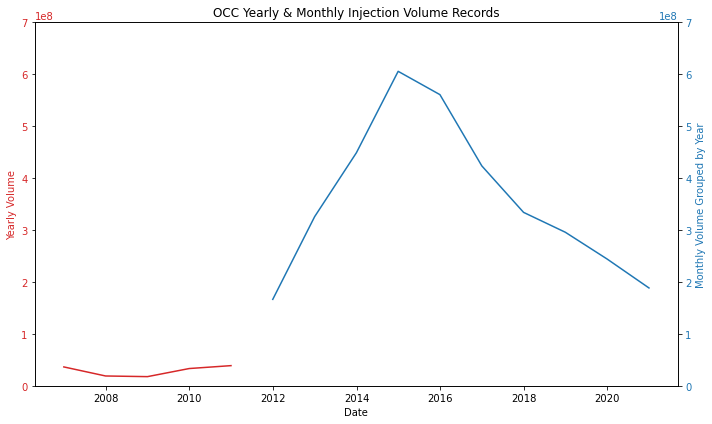

In [47]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Yearly Volume', color=color)
ax1.plot(yearly_sum_df.index, yearly_sum_df.total_volume, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 700000000)
ax1.set_title("OCC Yearly & Monthly Injection Volume Records")


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly Volume Grouped by Year', color=color)  # we already handled the x-label with ax1
ax2.plot(yearly_inj_df.index, yearly_inj_df.total_volume, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 700000000)

fig.set_size_inches(10, 6)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [21]:
yearly_inj_all = yearly_sum_df.append(yearly_inj_df, ignore_index=False)
yearly_inj_all

,total_volume
date,
2006-12-31,3.635316e+07
2007-12-31,1.891344e+07
2008-12-31,1.765615e+07
2009-12-31,3.325481e+07
2010-12-31,3.884118e+07
2011-12-31,1.664990e+08
2012-12-31,3.258057e+08
2013-12-31,4.489084e+08
2014-12-31,6.057499e+08


<IPython.core.display.Javascript object>


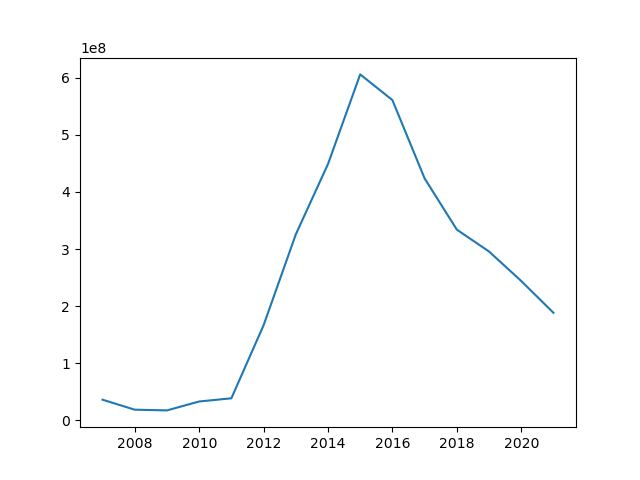

In [30]:
plt.plot(yearly_inj_all.index, yearly_inj_all.total_volume)

In [31]:
# yearly_inj_all.to_csv(f"/Users/curtissmith/Projects/oklahoma_earthquakes_largefiles/python_exports/all_yearly_injection_volume.csv", index = True)


In [51]:
eq_count_inj_merged = pd.merge(df_monthly_reduced,monthly_count_eq_df,on='date')

In [52]:
eq_count_inj_merged.rename(columns={"count":"well_count", "mag":"count_mag>=3"}, inplace = True)
eq_count_inj_merged

,date,monthly_volume,well_count,count_>0,count_mag>=3
0,2011-01-31,10643949.0,205,141,1
1,2011-02-28,9144807.0,205,143,0
2,2011-03-31,11135572.0,205,148,2
3,2011-04-30,11033870.0,205,155,0
4,2011-05-31,12309264.0,205,158,0
...,...,...,...,...,...
112,2020-08-31,14347672.0,551,291,5
113,2020-09-30,14347550.0,551,319,2
114,2020-10-31,13677428.0,551,289,4
115,2020-11-30,13658160.0,551,282,0


In [120]:
X = eq_count_inj_merged.monthly_volume.values.reshape((-1,1))
y = eq_count_inj_merged["count_mag>=3"].values.reshape((-1,1))

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [137]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_sq = regressor.score(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(r_sq)

LinearRegression()

[-25.1450493]
[[1.57943924e-06]]
0.5927309087154086


In [123]:
y_pred = regressor.predict(X_test)

In [124]:
regressor.score(X_test,y_test)

0.4821151630731674

In [125]:
y = y_pred.tolist()
y_pred_list = [item[0] for item in y]
y_pred_dict = {"y_pred": y_pred_list}


In [128]:
y = y_test.tolist()
y_test_list = [item[0] for item in y]
y_test_dict = {"y_test": y_test_list}

In [135]:
df_pred_test = pd.DataFrame.from_dict({'Actual': y_test_list, 'Predicted': y_pred_list})
df_pred_test

,Actual,Predicted
0,48,4.204069
1,116,42.358882
2,6,6.090429
3,7,14.131103
4,3,-1.519598
5,9,16.221327
6,22,30.560342
7,5,-2.483773
8,3,23.425312
9,4,10.334243


In [81]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13.539184467572994
Mean Squared Error: 438.29510836849903
Root Mean Squared Error: 20.935498760920385


In [66]:
r_sq = model.score(X_test, y_)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.5669000311222894
intercept: [-25.35353849]
slope: [[1.62081639e-06]]


In [213]:
eq_count_inj_minus_7 = pd.merge(df_monthly_reduced,monthly_count_eq_minus_7_df,on='date')
eq_count_inj_minus_7.rename(columns={"count":"well_count", "mag":"count_mag>=3"}, inplace = True)

X = eq_count_inj_minus_7.monthly_volume.values.reshape((-1,1))
y = eq_count_inj_minus_7["count_mag>=3"].values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_sq = regressor.score(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(r_sq)

y_pred = regressor.predict(X_test)

print(regressor.score(X_test,y_test))

LinearRegression()

[-25.09349171]
[[1.60287894e-06]]
0.5568833828552373
0.6689205646173071


In [214]:
eq_count_inj_minus_14 = pd.merge(df_monthly_reduced,monthly_count_eq_minus_14_df,on='date')
eq_count_inj_minus_14.rename(columns={"count":"well_count", "mag":"count_mag>=3"}, inplace = True)

X = eq_count_inj_minus_14.monthly_volume.values.reshape((-1,1))
y = eq_count_inj_minus_14["count_mag>=3"].values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_sq = regressor.score(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(r_sq)

y_pred = regressor.predict(X_test)

print(regressor.score(X_test,y_test))

LinearRegression()

[-25.12874368]
[[1.61448574e-06]]
0.5380657761718193
0.7177868363041234


In [215]:
eq_count_inj_minus_21 = pd.merge(df_monthly_reduced,monthly_count_eq_minus_21_df,on='date')
eq_count_inj_minus_21.rename(columns={"count":"well_count", "mag":"count_mag>=3"}, inplace = True)

X = eq_count_inj_minus_21.monthly_volume.values.reshape((-1,1))
y = eq_count_inj_minus_21["count_mag>=3"].values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_sq = regressor.score(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(r_sq)

y_pred = regressor.predict(X_test)

print(regressor.score(X_test,y_test))

LinearRegression()

[-25.95149244]
[[1.64361419e-06]]
0.5659330739205741
0.694311807827982


In [216]:
eq_count_inj_minus_28 = pd.merge(df_monthly_reduced,monthly_count_eq_minus_28_df,on='date')
eq_count_inj_minus_28.rename(columns={"count":"well_count", "mag":"count_mag>=3"}, inplace = True)

X = eq_count_inj_minus_28.monthly_volume.values.reshape((-1,1))
y = eq_count_inj_minus_28["count_mag>=3"].values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_sq = regressor.score(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(r_sq)

y_pred = regressor.predict(X_test)

print(regressor.score(X_test,y_test))

LinearRegression()

[-26.69673203]
[[1.68069187e-06]]
0.5759214761090148
0.6689062766330853


In [217]:
eq_count_inj_minus_35 = pd.merge(df_monthly_reduced,monthly_count_eq_minus_35_df,on='date')
eq_count_inj_minus_35.rename(columns={"count":"well_count", "mag":"count_mag>=3"}, inplace = True)

X = eq_count_inj_minus_35.monthly_volume.values.reshape((-1,1))
y = eq_count_inj_minus_35["count_mag>=3"].values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_sq = regressor.score(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(r_sq)

y_pred = regressor.predict(X_test)

print(regressor.score(X_test,y_test))

LinearRegression()

[-26.78325694]
[[1.68419598e-06]]
0.596100460039902
0.6574772577553354


In [218]:
eq_count_inj_minus_42 = pd.merge(df_monthly_reduced,monthly_count_eq_minus_42_df,on='date')
eq_count_inj_minus_42.rename(columns={"count":"well_count", "mag":"count_mag>=3"}, inplace = True)

X = eq_count_inj_minus_42.monthly_volume.values.reshape((-1,1))
y = eq_count_inj_minus_42["count_mag>=3"].values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_sq = regressor.score(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(r_sq)

y_pred = regressor.predict(X_test)

print(regressor.score(X_test,y_test))

LinearRegression()

[-26.71481144]
[[1.68092952e-06]]
0.5882784182931478
0.6593856086866309


In [219]:
eq_count_inj_minus_49 = pd.merge(df_monthly_reduced,monthly_count_eq_minus_49_df,on='date')
eq_count_inj_minus_49.rename(columns={"count":"well_count", "mag":"count_mag>=3"}, inplace = True)

X = eq_count_inj_minus_49.monthly_volume.values.reshape((-1,1))
y = eq_count_inj_minus_49["count_mag>=3"].values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_sq = regressor.score(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(r_sq)

y_pred = regressor.predict(X_test)

print(regressor.score(X_test,y_test))

LinearRegression()

[-27.48859553]
[[1.70498195e-06]]
0.5930866906512811
0.7226549407261016


In [220]:
eq_count_inj_minus_56 = pd.merge(df_monthly_reduced,monthly_count_eq_minus_56_df,on='date')
eq_count_inj_minus_56.rename(columns={"count":"well_count", "mag":"count_mag>=3"}, inplace = True)

X = eq_count_inj_minus_56.monthly_volume.values.reshape((-1,1))
y = eq_count_inj_minus_56["count_mag>=3"].values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_sq = regressor.score(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(r_sq)

y_pred = regressor.predict(X_test)

print(regressor.score(X_test,y_test))

LinearRegression()

[-27.23870068]
[[1.69059825e-06]]
0.5877079098863244
0.7597905320983802


In [258]:
eq_count_inj_minus_63 = pd.merge(df_monthly_reduced,monthly_count_eq_minus_63_df,on='date')
eq_count_inj_minus_63.rename(columns={"count":"well_count", "mag":"count_mag>=3"}, inplace = True)

X = eq_count_inj_minus_63.monthly_volume.values.reshape((-1,1))
y = eq_count_inj_minus_63["count_mag>=3"].values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_sq = regressor.score(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(r_sq)

y_pred = regressor.predict(X_test)

print(regressor.score(X_test,y_test))

LinearRegression()

[-27.12745551]
[[1.68489719e-06]]
0.6028418310325778
0.7459263427081473


In [259]:
eq_count_inj_minus_70 = pd.merge(df_monthly_reduced,monthly_count_eq_minus_70_df,on='date')
eq_count_inj_minus_70.rename(columns={"count":"well_count", "mag":"count_mag>=3"}, inplace = True)

X = eq_count_inj_minus_70.monthly_volume.values.reshape((-1,1))
y = eq_count_inj_minus_70["count_mag>=3"].values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_sq = regressor.score(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(r_sq)

y_pred = regressor.predict(X_test)

print(regressor.score(X_test,y_test))

LinearRegression()

[-29.74408182]
[[1.7617492e-06]]
0.6425910500222838
0.6354563812200437


Text(0.5, 0, 'Injection Volume')

Text(0, 0.5, 'Monthly Number of Earthquakes (M >=3)')

Text(0.5, 1.0, 'Monthly Injection Volume vs. Monthly Earthquakes M >= 3 - Time Offset: 56 Days')

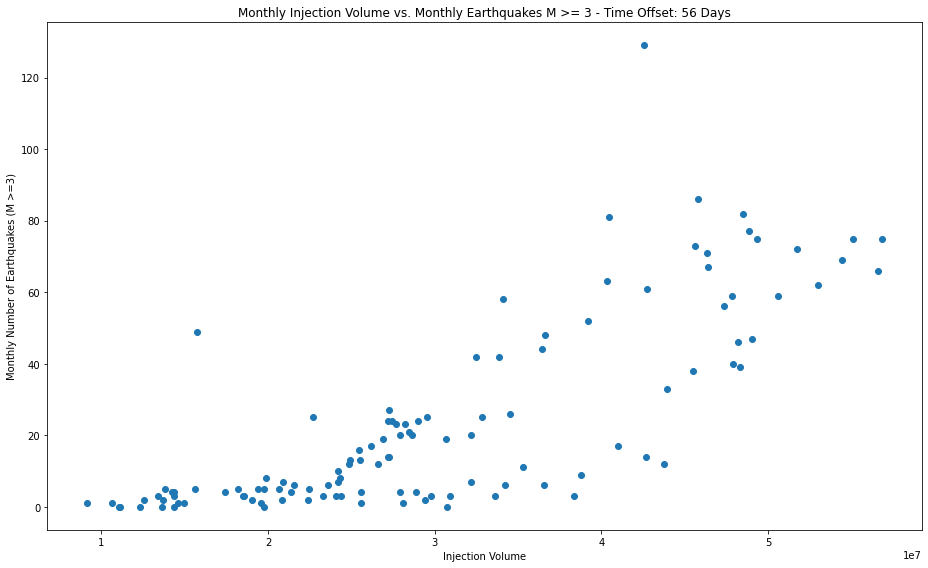

In [223]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Injection Volume')
ax1.set_ylabel('Monthly Number of Earthquakes (M >=3)')
ax1.scatter(eq_count_inj_minus_56.monthly_volume, eq_count_inj_minus_56["count_mag>=3"])
# ax1.plot(X, Y_pred, color='red')
ax1.tick_params(axis='y')
# ax1.set_ylim(-20, 130)
# ax1.set_xlim(0, 70000000)
ax1.set_title("Monthly Injection Volume vs. Monthly Earthquakes M >= 3 - Time Offset: 56 Days")

fig.set_size_inches(13, 8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Monthly Number of Earthquakes (M >=3)')

(-20.0, 120.0)

Text(0.5, 1.0, 'Monthly Earthquake Count vs. Arbuckle Monthly SWD Well Injection Volume')

Text(0, 0.5, 'Monthly Injection Mean Volume per Day (barrels)')

(0.0, 70000000.0)

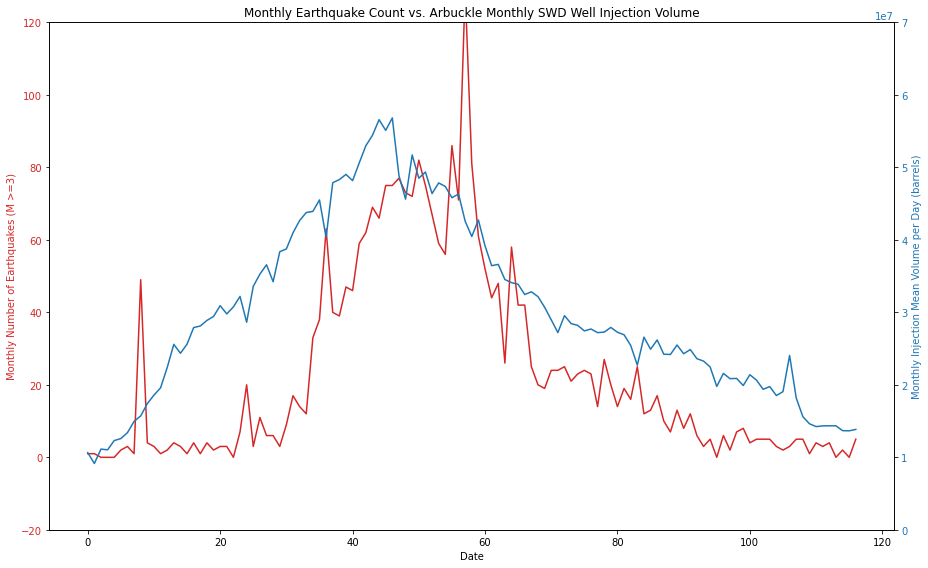

In [224]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Number of Earthquakes (M >=3)', color=color)
ax1.plot(eq_count_inj_minus_56.index, eq_count_inj_minus_56["count_mag>=3"], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-20, 120)
ax1.set_title("Monthly Earthquake Count vs. Arbuckle Monthly SWD Well Injection Volume")


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly Injection Mean Volume per Day (barrels)', color=color)  # we already handled the x-label with ax1
ax2.plot(eq_count_inj_minus_56.index, eq_count_inj_minus_56.monthly_volume, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 70000000)

fig.set_size_inches(13, 8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

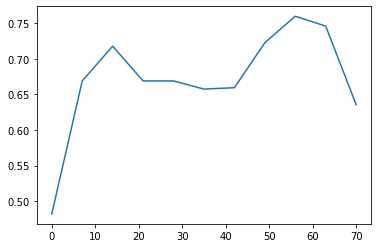

In [260]:
offset = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70]
train_score = [0.5927309087154086, 0.5568833828552373, 0.5380657761718193, 0.5659330739205741, 0.5759214761090148,
              0.596100460039902, 0.5882784182931478, 0.5930866906512811, 0.5877079098863244, 0.6028418310325778, 
               0.6425910500222838]
test_score = [0.4821151630731674, 0.6689205646173071, 0.7177868363041234, 0.6689062766330853, 0.6689062766330853,
             0.6574772577553354, 0.6593856086866309, 0.7226549407261016, 0.7597905320983802, 0.7459263427081473,
             0.6354563812200437]

plt.plot(offset, test_score)